### 4.1 The Constant Model
The bus is supposed to arrive every 10 minutes, but Jake notices that he sometimes waits a long time for the bus. He wants to know how late the bus usually is. 

In [71]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

In [72]:
times = pd.read_csv("4.1/seattle_bus_times_nc.csv")
times

,route,direction,scheduled,actual,minutes_late
0,C,northbound,2016-03-26 06:30:28,2016-03-26 06:26:04,-4.400000
1,C,northbound,2016-03-26 01:05:25,2016-03-26 01:10:15,4.833333
2,C,northbound,2016-03-26 21:00:25,2016-03-26 21:05:00,4.583333
3,C,northbound,2016-03-26 22:30:25,2016-03-26 22:34:28,4.050000
4,C,northbound,2016-03-26 20:15:25,2016-03-26 20:23:39,8.233333
...,...,...,...,...,...
1429,C,northbound,2016-04-10 13:15:28,2016-04-10 13:11:36,-3.866667
1430,C,northbound,2016-04-10 10:45:28,2016-04-10 10:40:56,-4.533333
1431,C,northbound,2016-04-10 06:15:28,2016-04-10 06:11:37,-3.850000
1432,C,northbound,2016-04-10 17:00:28,2016-04-10 16:56:54,-3.566667


The ```minutes_late``` column in the data table records how late each bus was.

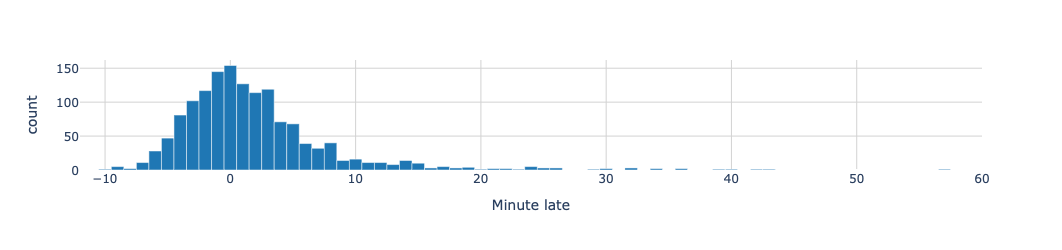

In [73]:
# Examine a histogram of the minutes each bus is late:
fig = px.histogram(times, x='minutes_late', width=450, height=250)

# Update the style of the histogram
fig.update_traces(marker_color='#1f77b4', 
                  marker_line_color='#ffffff',
                  marker_line_width=0.5,
                  opacity=1)

# Update the axes
fig.update_xaxes(range=[-12, 60], title_text='Minute late')
fig.update_yaxes(title_text='count')

# Update layout
fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    xaxis=dict(
        showgrid=True,
        gridcolor='lightgray',
        gridwidth=1
    ),
    yaxis=dict(
        showgrid=True,
        gridcolor='lightgray',
        gridwidth=1
    )
)
fig

To understand how late a bus on this route typically is, we'd like to summarize lateness by a constant - this is a statistic, a single number, like the mean, median, or mode. 

In [74]:
print(f"mean:   {round(times['minutes_late'].mean(), 2)} mins late")
print(f"median: {round(times['minutes_late'].median(), 2)} mins late")
print(f"mode:   {0:.2f} mins late")

mean:   1.92 mins late
median: 0.74 mins late
mode:   0.00 mins late


Next, we want to know which of these numbers best represents a summary of lateness. We make a constant model for bus lateness. Let's call this constant θ (in modeling, θ is often referred to as a parameter).

__For example, if we consider θ = 5, then our model approximates the bus to typically be five minutes late.__

However, 5 isn't a particularly good guess. From the histogram, we saw that there are many more points closer to 0 than 5. But it isn't clear that θ = 0 (the mode) is a better choice than θ = 0.74 (the median), θ = 1.92 (the mean), or something else entirely. 

__To make choices between different values of θ, we would like to assign any value of θ a score that measures how well that constant fits the data.__

That is saying, we want to access the loss involved in approximating the data by a constant, like θ = 5. Ideally, we want to pick the constant that best fits our data, meaning ```the constant that has the smallest loss```.

### 4.2 Minimizing Loss
We use a loss function - a function that measures how far away our prediction (constant θ), is from the actual data. 

A loss function takes in θ and a data value y. It outputs a single number, the loss, that measures how far away θ is from y. We write the loss function as ```l(θ, y)```. We find the θ that **minimizes** the average loss for our data, y1, ..., yn. 

We write the average loss as:

L(θ, y1, y2, ..., yn) = mean{l(θ, y1), l(θ, y2), ..., l(θ, yn)} $= \frac{1}{n} \sum_{i=1}^{n} l(\theta, y_i)$

As a shorthand, we often use the vector **y** = [y1, y2, ..., yn].

Then we can write the average loss as: 
L(θ, **y**) $= \frac{1}{n} \sum_{i=1}^{n} l(\theta, y_i)$

Next, we look at two particular loss functions: absolute error and squared error. 

#### 4.2.1 Mean Absolute Error
1. Find the error, y - θ
2. Take the absolute value of the error, |y - θ|.

So the loss function is **l(θ, y) = |y - θ|**.

_Taking the absolute value of the error is a simple way to convert negative errors into positive ones._ Then the negative ones are equally bad as postive ones, like the point y = 4, θ = 2 and θ = 6 are equally "bad".

In [59]:
def mae_loss(theta, y_vals):
    y_vals = np.array(y_vals)
    return np.mean(np.abs(y_vals - theta))

In [60]:
# Let's see how this loss function behaves when we have just 5 data points:
data_points = [-1, 0, 2, 5, 10]
thetas = [-2, 0, 1, 2, 3, 4]
loss_dict = {theta: mae_loss(theta, data_points) for theta in thetas}

# List the loss values for different theta values
print("θ : Avg loss")
for theta, avg_loss in loss_dict.items():
    print(f"{theta:2d}: {avg_loss}")

θ : Avg loss
-2: 5.2
 0: 3.6
 1: 3.4
 2: 3.2
 3: 3.4
 4: 3.6


So θ = 2 has the lowest mean absolute error. For this simple example, 2 is the median of the data values. 

Let's check what the average loss is for the original dataset of bus late times. 

In [61]:
mins_late_list = list(times['minutes_late'])
thetas = [0, 0.74, 1.92]
mins_loss_dict = {theta: mae_loss(theta, mins_late_list) for theta in thetas}

# List the loss values for different theta values
print("   θ: Avg loss")
for theta, avg_loss in mins_loss_dict.items():
    print(f"{theta:>4}: {avg_loss}")

   θ: Avg loss
   0: 4.0973733147373315
0.74: 4.047326824732682
1.92: 4.183342631334263


We see again that the median (middle plot) gives a smaller loss than the mode and mean.

__For absolute loss, the minimizing θ̂ is the median {y1, y2, ..., yn}.__

Next, let's draw the MAE curve for the bus data.

In [81]:
# Define a range of theta values to test
theta_values = np.linspace(-2, 8, 100)

# Calculate MAE for each theta value
mae_values = []
for theta in theta_values:
    mae_values.append(mae_loss(theta, mins_late_list))

# Find median
median_value = np.median(mins_late_list)
min_mae = mae_loss(median_value, mins_late_list)

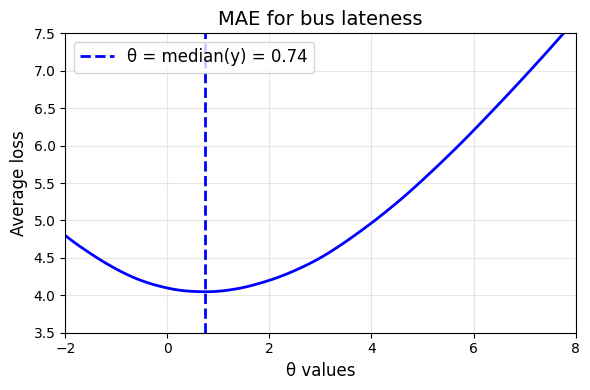

In [82]:
# Create the plot
plt.figure(figsize=(6, 4))

# Plot the MAE curve
plt.plot(theta_values, mae_values, 'b-', linewidth=2)

# Add vertical dashed line at median
plt.axvline(x=median_value, color='blue', linestyle='--', linewidth=2,
            label=f'θ = median(y) = {median_value:.2f}')

# Add a point at the minimum
# plt.plot(median_value, min_mae, 'bo', markersize=8)

# Customise the plot
plt.title('MAE for bus lateness', fontsize=14)
plt.xlabel('θ values', fontsize=12)
plt.ylabel('Average loss', fontsize=12)
plt.grid(True, alpha=0.3)

# Add the legend
plt.legend(loc='upper left', fontsize=12)

# Set axis limits
plt.xlim(-2, 8)
plt.ylim(3.5, 7.5)

# Show the plot
plt.tight_layout()
plt.show()

#### 4.2.2 Mean Squared Error
1. Find the error, y - θ
2. Take the square of the error, (y - θ)²
This gives the loss function **l(θ, y) = (y - θ)²**.

In [83]:
def mse_loss(theta, y_vals):
    y_vals = np.array(y_vals)
    return np.mean((y_vals - theta) ** 2)

In [84]:
# Let's again try the mean, median, and mode as potential minimizers of the MSE:
thetas = [0, 0.74, 1.92]
mins_loss_dict = {theta: mse_loss(theta, mins_late_list) for theta in thetas}

# List the loss values for different theta values
print("   θ: Avg loss")
for theta, avg_loss in mins_loss_dict.items():
    print(f"{theta:>4}: {avg_loss}")

   θ: Avg loss
   0: 43.74810514489385
0.74: 41.454256516348984
1.92: 40.062097892453124


Now when we fit the constant model using MSE loss, we find that the mean (1.92) has a smaller loss than the mode and the median. 

Let's plot the MSE curve for different values of θ given our data. 

In [85]:
# Define a range of theta values to test
theta_values = np.linspace(-2, 8, 100)

# Calculate MSE for each theta value
mse_values = []
for theta in theta_values:
    mse_values.append(mse_loss(theta, mins_late_list))

# Find mean 
mean_value = np.mean(mins_late_list)
min_mse = mse_loss(mean_value, mins_late_list)

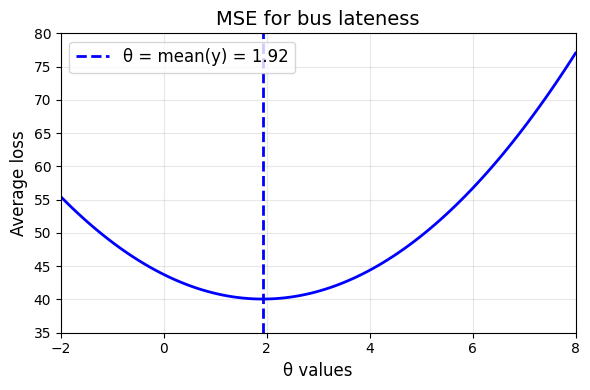

In [86]:
# Create the plot
plt.figure(figsize=(6, 4))

# Plot the mse curve
plt.plot(theta_values, mse_values, 'b-', linewidth=2)

# Add vertical dashed line in the median
plt.axvline(x=mean_value, color='blue', linestyle='--', linewidth=2,
            label=f'θ = mean(y) = {mean_value:.2f}')

# Customise the plot
plt.title("MSE for bus lateness", fontsize=14)
plt.xlabel("θ values", fontsize=12)
plt.ylabel("Average loss", fontsize=12)
plt.grid(True, alpha=0.3)

# Add legend
plt.legend(loc='upper left', fontsize=12)

# Set axis limits
plt.xlim(-2, 8)
plt.ylim(35, 80)

# Show the plot
plt.tight_layout()
plt.show()

Because of the nature of squaring errors, the MSE is more sensitive to unusually large data values than the MAE.

For absolute loss, the best constant model is the **model**, but for squared error, it's the **mean**.

### How do we choose whether to use the median, mean, or mode?
What is the most appropriate loss function for our problem? To answer this question, __we look at the context of our problem__.

Compared to the MAE, the MSE gives especially large losses when the bus is much later (or earlier) than expected. A bus rider who wants to understand the typical late times would use the MAE and the median (0.74 minutes late), but a rider who despises unexpected large late times might summarize the data using the MSE and the mean (1.92 minutes late).

If we want to refine the model even more, we can use a more specialized loss function. For example, suppose that when a bus arrives early, it waits at the stop until the scheduled time of departure; then we might want to assign an early arrival 0 loss. 

And if a really late bus is a larger aggravation than a moderately late one, we might choose an **asymmetric loss function** that gives a larger penalty to super-late arrivals. 